# PRODUCT REVIEWS SENTIMENT PREDICTION USING WEB SCRAPING

In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [3]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [4]:
tokens = tokenizer.encode('It was worst but couldve been bad', return_tensors='pt')
result = model(tokens)
result.logits
int(torch.argmax(result.logits))+1

1

In [5]:
# r = requests.get('https://www.amazon.in/ask/questions/asin/B09G9H3RZH/1/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true')
# soup = BeautifulSoup(r.text, 'html.parser')
# regex = re.compile('.*ask-no-op*')
# results = soup.find_all('span', {'data-action':regex})
# questions = [result.text for result in results]
# questions[:] = [res.lstrip('\n') for res in questions]
# questions[:] = [res.rstrip('\n') for res in questions]
# questions
questions=[]
URL = ['https://www.amazon.in/ask/questions/asin/B09G9H3RZH/1/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/2/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
      'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/3/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/4/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/5/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/6/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/7/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/8/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/9/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/10/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/11/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
      'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/12/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/13/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/14/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/15/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',]
for url in range(0,15):
    r = requests.get(URL[url])
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all(text='Question:')
    for i in results:
        j=i.find_next('span')
        questions.append(j.text)
questions

['\n                \n                  \n                  \n                    What all accessories comes in the box with phone?\n                  \n                \n              ',
 '\n                \n                  \n                  \n                    Is this model,how much capacity of ram?\n                  \n                \n              ',
 '\n                \n                  \n                  \n                    What is the camera?\n                  \n                \n              ',
 '\n                \n                  \n                  \n                    It camera is very clear\n                  \n                \n              ',
 '\n                \n                  \n                  \n                    Does it still have a notch?\n                  \n                \n              ',
 "\n                \n                  \n                  \n                    Hi friends i want to buy a mobile. but confused between iphone13 p

In [204]:
import warnings
warnings.filterwarnings('ignore')
from cleantext import clean
review=[]
for text in questions:
        text=clean(text, no_emoji=True)
        review.append(text)
result = list(filter(None, review))
result

['what all accessories comes in the box with phone?',
 'is this model,how much capacity of ram?',
 'what is the camera?',
 'it camera is very clear',
 'does it still have a notch?',
 "hi friends i want to buy a mobile. but confused between iphone13 promax and samsung galaxy s22ultra. present i'm using samsung galaxy note 8.plz help.",
 'this phone 5g',
 'iphone 13 pro max sierra blue 128',
 'how many battery',
 'this phone is dual sim or single sim',
 'unable to place order, when will this get back in stock?',
 'if i buy this which thing will come first sadness or happiness ?',
 'exchange is available',
 '13 pro max is what model is this',
 'does this model support 90 fps in bgmi?',
 'is it unlocked for all the carrier in the world...??',
 'my order of iphone will come tomorrow can i change to 256',
 'what is in packing',
 'why out of stocks iphone 13 pro max',
 'can we play gta 5 in free',
 'apple care?',
 'when this products will be available again?',
 'is it dual sim or single sim',

In [7]:
answers=[]
URL = ['https://www.amazon.in/ask/questions/asin/B09G9H3RZH/1/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/2/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
      'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/3/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/4/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/5/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/6/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/7/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/8/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/9/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/10/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/11/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
      'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/12/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/13/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/14/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',
       'https://www.amazon.in/ask/questions/asin/B09G9H3RZH/15/ref=ask_ql_psf_ql_hza?sort=HELPFUL&isAnswered=true',]
for url in range(0,15):
    r = requests.get(URL[url])
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all(text='Answer:')
    for i in results:
        j=i.find_next('span')
        answers.append(j.text)
answers

['Just the USB C to Lightning Cable and the SIM Removing Tool',
 '6GB',
 '12 MP!',
 'Yes best camera available',
 'Yes',
 'I have an I phone but I prefer android over ios . Simplicity is more important than security for me',
 'Yes',
 'yes',
 '1',
 'dual one physical and one e sim',
 'Yes',
 'happiness followed by sadness',
 "Exchange of old mobile is available in most of the pin codes…. Even if you get the product as damaged (mostly it won't happen) they will replace the product, only after a clear check.",
 'Very nice',
 'Yes it supports',
 'Yes',
 'No, you have to cancel it / reject the deliver and pleace a new request/order for the 256 one!',
 'Mobile and Charging cable.',
 'Supply chain issues',
 'No',
 'Better to take for more protection physical damage can be claimed',
 'up to 16 hours depends on use',
 'If you had ordered on the first day you would have got it by now',
 'Single Sim',
 'It’s max 27 watts you can charge it with.',
 'Not possible',
 '4300 mah',
 'the curved screen 

In [8]:
import warnings
warnings.filterwarnings('ignore')
from cleantext import clean
review_1=[]
for text in answers:
        text=clean(text, no_emoji=True)
        review_1.append(text)
result_1 = list(filter(None, review_1))
result_1

['just the usb c to lightning cable and the sim removing tool',
 '6gb',
 '12 mp!',
 'yes best camera available',
 'yes',
 'i have an i phone but i prefer android over ios . simplicity is more important than security for me',
 'yes',
 'yes',
 '1',
 'dual one physical and one e sim',
 'yes',
 'happiness followed by sadness',
 "exchange of old mobile is available in most of the pin codes. even if you get the product as damaged (mostly it won't happen) they will replace the product, only after a clear check.",
 'very nice',
 'yes it supports',
 'yes',
 'no, you have to cancel it / reject the deliver and pleace a new request/order for the 256 one!',
 'mobile and charging cable.',
 'supply chain issues',
 'no',
 'better to take for more protection physical damage can be claimed',
 'up to 16 hours depends on use',
 'if you had ordered on the first day you would have got it by now',
 'single sim',
 "it's max 27 watts you can charge it with.",
 'not possible',
 '4300 mah',
 'the curved screen i

In [9]:
len(result)

139

In [10]:
len(result_1)

145

In [63]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.array(result), columns=['questions'])
df

,questions
0,what all accessories comes in the box with phone?
1,"is this model,how much capacity of ram?"
2,what is the camera?
3,it camera is very clear
4,does it still have a notch?
...,...
134,when is the stock expected for pro max sierra blue?
135,why this product is out of stock from last 1.5 months
136,warranty not described in details then how to cover in warranty?
137,when is 13pro max series going to be available in india ? please update


In [64]:
df1 = pd.DataFrame(np.array(result_1), columns=['answers'])
df1

,answers
0,just the usb c to lightning cable and the sim removing tool
1,6gb
2,12 mp!
3,yes best camera available
4,yes
...,...
140,1.5 days
141,you will get full details in the invoice like 130 minus 5 and 125 final bill
142,no
143,no only usb type c cable will be provided


In [65]:
df.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)
result_df = pd.concat([df, df1], axis=1)
result_df

,questions,answers
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool
1,"is this model,how much capacity of ram?",6gb
2,what is the camera?,12 mp!
3,it camera is very clear,yes best camera available
4,does it still have a notch?,yes
...,...,...
140,NaN,1.5 days
141,NaN,you will get full details in the invoice like 130 minus 5 and 125 final bill
142,NaN,no
143,NaN,no only usb type c cable will be provided


In [66]:
result_df.fillna(value='kitani rom hai',inplace=True)
result_df

,questions,answers
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool
1,"is this model,how much capacity of ram?",6gb
2,what is the camera?,12 mp!
3,it camera is very clear,yes best camera available
4,does it still have a notch?,yes
...,...,...
140,kitani rom hai,1.5 days
141,kitani rom hai,you will get full details in the invoice like 130 minus 5 and 125 final bill
142,kitani rom hai,no
143,kitani rom hai,no only usb type c cable will be provided


In [67]:
def sentiment_score(questions):
    tokens = tokenizer.encode(questions, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
result_df['sentiment_question'] = result_df['questions'].apply(lambda x: sentiment_score(x[:512]))
result_df

,questions,answers,sentiment_question
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1
1,"is this model,how much capacity of ram?",6gb,3
2,what is the camera?,12 mp!,1
3,it camera is very clear,yes best camera available,4
4,does it still have a notch?,yes,3
...,...,...,...
140,kitani rom hai,1.5 days,1
141,kitani rom hai,you will get full details in the invoice like 130 minus 5 and 125 final bill,1
142,kitani rom hai,no,1
143,kitani rom hai,no only usb type c cable will be provided,1


In [68]:
def sentiment_score(answers):
    tokens = tokenizer.encode(answers, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
result_df['sentiment_answers'] = result_df['answers'].apply(lambda x: sentiment_score(x[:512]))

In [69]:
que_count1,que_count2,que_count3,que_count4,que_count5=0,0,0,0,0
for que in result_df['sentiment_question']:
    if(que==1):
        que_count1=que_count1+1
    elif(que==2):
        que_count2=que_count2+1
    elif(que==3):
        que_count3=que_count3+1
    elif(que==4):
        que_count4=que_count4+1
    else:
        que_count5=que_count5+1
print(que_count1,que_count2,que_count3,que_count4,que_count5)
print(que_count1+que_count2+que_count3+que_count4+que_count5)
graph_questions=np.array([que_count1,que_count2,que_count3,que_count4,que_count5])
graph_questions

49 12 41 8 35
145


array([49, 12, 41,  8, 35])

In [70]:
ans_count1,ans_count2,ans_count3,ans_count4,ans_count5=0,0,0,0,0
for ans in result_df['sentiment_answers']:
    if(ans==1):
        ans_count1=ans_count1+1
    elif(ans==2):
        ans_count2=ans_count2+1
    elif(ans==3):
        ans_count3=ans_count3+1
    elif(ans==4):
        ans_count4=ans_count4+1
    else:
        ans_count5=ans_count5+1
print(ans_count1,ans_count2,ans_count3,ans_count4,ans_count5)
print(ans_count1+ans_count2+ans_count3+ans_count4+ans_count5)
graph_answers=np.array([ans_count1,ans_count2,ans_count3,ans_count4,ans_count5])
graph_answers

36 4 28 10 67
145


array([36,  4, 28, 10, 67])

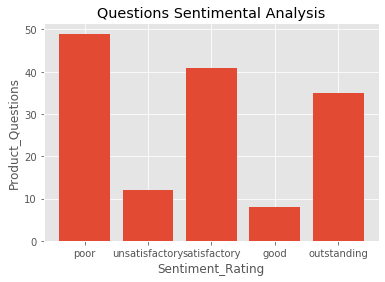

In [166]:
rating=['poor','unsatisfactory','satisfactory','good','outstanding']
import matplotlib.pyplot as plt
plt.bar(rating,graph_questions)
plt.ylabel('Product_Questions')
plt.xlabel('Sentiment_Rating')
plt.title('Questions Sentimental Analysis')
plt.savefig('Question_Sentiment_Analysis')

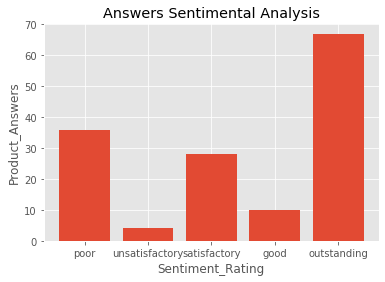

In [167]:
plt.bar(rating,graph_answers)
plt.ylabel('Product_Answers')
plt.xlabel('Sentiment_Rating')
plt.title('Answers Sentimental Analysis')
plt.savefig('Answers_Sentiment_Analysis')

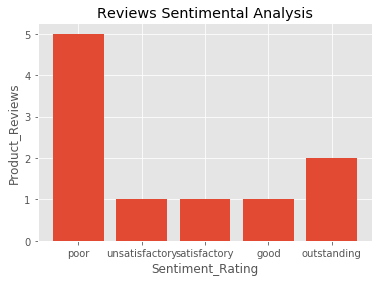

In [168]:
graph_review=np.array([5, 1, 1, 1, 2])
plt.bar(rating,graph_review)
plt.ylabel('Product_Reviews')
plt.xlabel('Sentiment_Rating')
plt.title('Reviews Sentimental Analysis')
plt.savefig('Reviews_Sentiment_Analysis')

In [22]:
result_df.to_csv("Aamazon.csv")

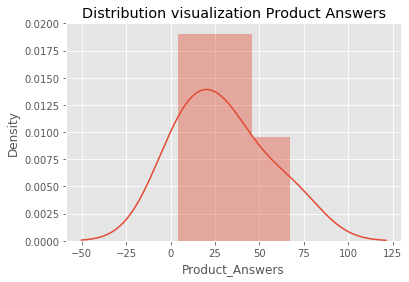

In [169]:
import seaborn as sns
sns.distplot(graph_answers)
plt.xlabel('Product_Answers')
plt.title('Distribution visualization Product Answers')
plt.savefig('Answers_Distribution')

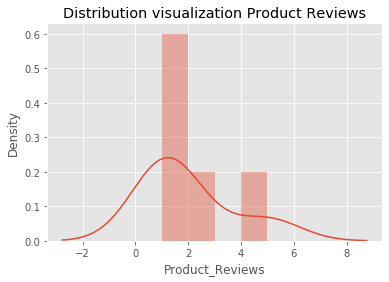

In [170]:
sns.distplot(graph_review)
plt.xlabel('Product_Reviews')
plt.title('Distribution visualization Product Reviews')
plt.savefig('Reviews_Distribution')

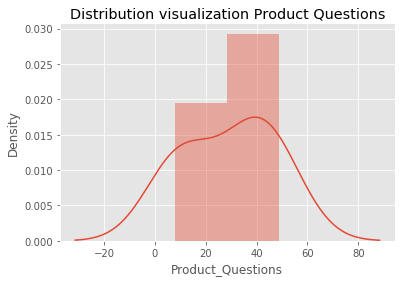

In [171]:
sns.distplot(graph_questions)
plt.xlabel('Product_Questions')
plt.title('Distribution visualization Product Questions')
plt.savefig('Questions_Distribution')

In [26]:
data=list([graph_questions,graph_answers,graph_review])

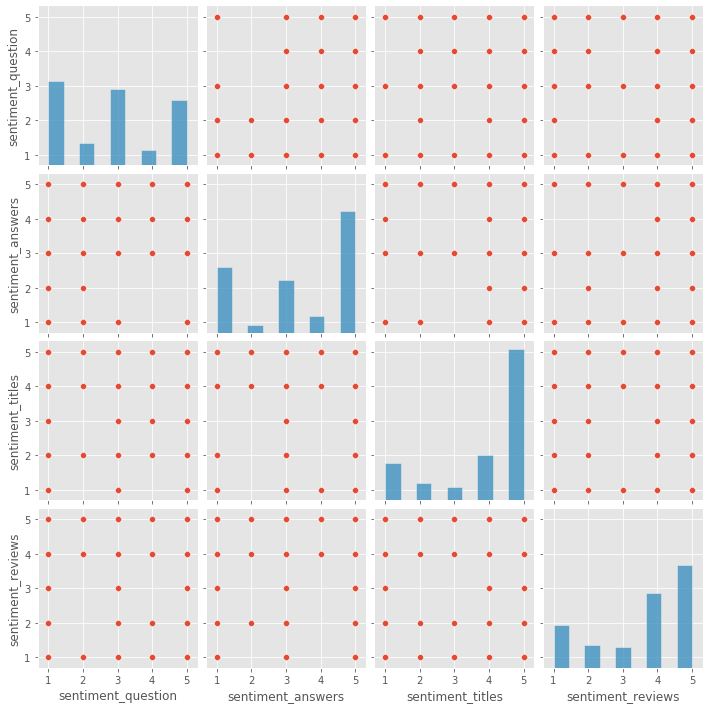

In [172]:
sns.pairplot(result_df)

In [58]:
reviews=[]
URL = ['https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=1',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=2',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=3',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=4',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=5',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=6',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=7',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=8',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=9',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=10',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=11',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=12',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=13',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=14',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=15',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=16',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=17',
      'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=18']
for url in range(0,18):
#     r = requests.get(URL[url])
#     soup = BeautifulSoup(r.text, 'html.parser')
#     results = soup.find_all('a', {'data-hook':'review-title'})
#     reviews.append(results)
# reviews
    r = requests.get(URL[url])
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all('a',{'data-hook':'review-title'})
    for i in results:
        j=i.find_next('span')
        reviews.append(j.text)
reviews

['Do not purchase this I phone',
 '😂😂😂😂',
 'Damaged product received',
 'Excellent upgrade in context of being 90k poorer.',
 'trash af',
 'Very good product but I have no money',
 '✋',
 'Overrated Product!',
 'Truly worth the money spent! Even if you go broke!',
 'An white elephant. wth retrograde design. Cheap appearance',
 'Touch not working in all the corners',
 'Fraud!',
 'iPhone 13 is amazing.',
 "iPhone's are always good but this one is the best.",
 'Recieved damage product',
 "It's not a phone, it's iphone",
 'I got a used phone on Amazon',
 'Bakwas bakwas bakwas',
 'Worth the upgrade',
 'It’s an all-round performer',
 'Awesome',
 'Thanks Amazon for a Prompt delivery of my Genuine iPhone 13, 256 GB Starlight',
 'Best Phone',
 'Worth the product',
 'iPhone 13 is in similar league as most iPhones are!',
 'Perfect phone for \uf8ff lovers❤️',
 'Wait',
 'Not great',
 'Battery life',
 'Awesome',
 'Satisfied 😊',
 'Good experience.',
 'Headset not working of my iphone',
 'Awesome phone

In [59]:
len(reviews)

140

In [62]:
result_df

,questions,answers,sentiment_question,sentiment_answers
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1,5
1,"is this model,how much capacity of ram?",6gb,3,5
2,what is the camera?,12 mp!,1,1
3,it camera is very clear,yes best camera available,4,5
4,does it still have a notch?,yes,3,5
...,...,...,...,...
122,installments main miljayga??,4352mahpowerful battery,3,5
123,call recording feature,yes,4,5
124,what is the difference between iphone 12 and iphone 13?,not available as compared to android,3,1
125,iphone 13 pro max me charging cable kis type ki ke,"processor, camera, fresh rate,",5,5


In [74]:
result_df.drop(result_df.tail(4).index,inplace=True)

In [76]:
reviews.append('Iphone')

In [77]:
result_df['reviews_title']=reviews
result_df

,questions,answers,sentiment_question,sentiment_answers,reviews_title
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1,5,Do not purchase this I phone
1,"is this model,how much capacity of ram?",6gb,3,5,😂😂😂😂
2,what is the camera?,12 mp!,1,1,Damaged product received
3,it camera is very clear,yes best camera available,4,5,Excellent upgrade in context of being 90k poorer.
4,does it still have a notch?,yes,3,5,trash af
...,...,...,...,...,...
136,warranty not described in details then how to cover in warranty?,due to supply chain issues of chipset,2,2,good product to buy
137,when is 13pro max series going to be available in india ? please update,one year for mobile,1,1,"Defective piece, can’t contact the seller too"
138,full charge time,sept 24th 2021,5,1,Good product
139,kitani rom hai,totally depends upon the charger you're using. this phone is capable of taking in a max input of 20w. so apple 20w charger is the best recommendation. you can juice it up fully in 1 hr 45 minutes using a usb type c to lightning cable.,1,5,Received used Mobile


In [78]:
def sentiment_score(reviews):
    tokens = tokenizer.encode(reviews, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
result_df['sentiment_titles'] = result_df['reviews_title'].apply(lambda x: sentiment_score(x[:512]))
result_df

,questions,answers,sentiment_question,sentiment_answers,reviews_title,sentiment_titles
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1,5,Do not purchase this I phone,1
1,"is this model,how much capacity of ram?",6gb,3,5,😂😂😂😂,5
2,what is the camera?,12 mp!,1,1,Damaged product received,1
3,it camera is very clear,yes best camera available,4,5,Excellent upgrade in context of being 90k poorer.,5
4,does it still have a notch?,yes,3,5,trash af,1
...,...,...,...,...,...,...
136,warranty not described in details then how to cover in warranty?,due to supply chain issues of chipset,2,2,good product to buy,4
137,when is 13pro max series going to be available in india ? please update,one year for mobile,1,1,"Defective piece, can’t contact the seller too",1
138,full charge time,sept 24th 2021,5,1,Good product,4
139,kitani rom hai,totally depends upon the charger you're using. this phone is capable of taking in a max input of 20w. so apple 20w charger is the best recommendation. you can juice it up fully in 1 hr 45 minutes using a usb type c to lightning cable.,1,5,Received used Mobile,3


In [81]:
comments=[]
URL = ['https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=1',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=2',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=3',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=4',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=5',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=6',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=7',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=8',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=9',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=10',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=11',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=12',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=13',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=14',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=15',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=16',
       'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=17',
      'https://www.amazon.in/product-reviews/B09G9FPGTN/ref=cm_cr_arp_d_paging_btm_prev_1?pageNumber=18']
for url in range(0,18):
#     r = requests.get(URL[url])
#     soup = BeautifulSoup(r.text, 'html.parser')
#     results = soup.find_all('a', {'data-hook':'review-title'})
#     reviews.append(results)
# reviews
    r = requests.get(URL[url])
    soup = BeautifulSoup(r.text, 'html.parser')
    results = soup.find_all('span',{'data-hook':'review-body'})
    for i in results:
        j=i.find_next('span')
        comments.append(j.text)
comments

['\n  This product is duplicate of iPhone 12 only camera design changed. Very low quality of this product Buy Samsung mobile phone\n',
 '\n  You should be a bigggggg bot to buy this phoneYou could get iPhone 12 Pro that’s the best 😂\n',
 '\n  There was a hairline scratch on the screen which is not clearly visible directly. When we tried contacting Amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with Amazon. Blame game begins and we end up paying the price. Awfull service. I am going to tag on the social media both Amazon and apple. Such a big scam\n',
 '\n  Just but iphone 12!It’s not worth the money!Unless ur from BJP or something where you’re full with corrupt money, then go ahead.\n',
 '\n  i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on  manday and cant study mole concept and got bored tha

In [82]:
len(comments)

150

In [83]:
comment=[]
for text in comments:
        text=clean(text, no_emoji=True)
        comment.append(text)

In [96]:
comment.pop(141)

'as expected iphone rocks.. high price'

In [97]:
result_df['reviews']=comment
result_df

,questions,answers,sentiment_question,sentiment_answers,reviews_title,sentiment_titles,reviews
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1,5,Do not purchase this I phone,1,this product is duplicate of iphone 12 only camera design changed. very low quality of this product buy samsung mobile phone
1,"is this model,how much capacity of ram?",6gb,3,5,😂😂😂😂,5,you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that's the best
2,what is the camera?,12 mp!,1,1,Damaged product received,1,"there was a hairline scratch on the screen which is not clearly visible directly. when we tried contacting amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with amazon. blame game begins and we end up paying the price. awfull service. i am going to tag on the social media both amazon and apple. such a big scam"
3,it camera is very clear,yes best camera available,4,5,Excellent upgrade in context of being 90k poorer.,5,"just but iphone 12!it's not worth the money!unless ur from bjp or something where you're full with corrupt money, then go ahead."
4,does it still have a notch?,yes,3,5,trash af,1,i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :)
...,...,...,...,...,...,...,...
136,warranty not described in details then how to cover in warranty?,due to supply chain issues of chipset,2,2,good product to buy,4,everything is perfect. amazon delivery and exchange was awesome.
137,when is 13pro max series going to be available in india ? please update,one year for mobile,1,1,"Defective piece, can’t contact the seller too",1,excellent
138,full charge time,sept 24th 2021,5,1,Good product,4,amazon customer
139,kitani rom hai,totally depends upon the charger you're using. this phone is capable of taking in a max input of 20w. so apple 20w charger is the best recommendation. you can juice it up fully in 1 hr 45 minutes using a usb type c to lightning cable.,1,5,Received used Mobile,3,i bought i phone 13 starlight few days ago... just wow... love it..


In [110]:
def sentiment_score(comment):
    tokens = tokenizer.encode(comment, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1
result_df['sentiment_reviews'] = result_df['reviews'].apply(lambda x: sentiment_score(x[:512]))
result_df

,questions,answers,sentiment_question,sentiment_answers,reviews_title,sentiment_titles,reviews,sentiment_reviews
0,what all accessories comes in the box with phone?,just the usb c to lightning cable and the sim removing tool,1,5,Do not purchase this I phone,1,this product is duplicate of iphone 12 only camera design changed. very low quality of this product buy samsung mobile phone,1
1,"is this model,how much capacity of ram?",6gb,3,5,😂😂😂😂,5,you should be a bigggggg bot to buy this phoneyou could get iphone 12 pro that's the best,5
2,what is the camera?,12 mp!,1,1,Damaged product received,1,"there was a hairline scratch on the screen which is not clearly visible directly. when we tried contacting amazon for the replacement, they asked us to connect to apple and when connected to apple, they asked to connect with amazon. blame game begins and we end up paying the price. awfull service. i am going to tag on the social media both amazon and apple. such a big scam",1
3,it camera is very clear,yes best camera available,4,5,Excellent upgrade in context of being 90k poorer.,5,"just but iphone 12!it's not worth the money!unless ur from bjp or something where you're full with corrupt money, then go ahead.",1
4,does it still have a notch?,yes,3,5,trash af,1,i am poor and i cant afford it lmao xdxdxdxdxd so if you have money to flex buy it i am bored thats why i am writing this review while drinking coffee i have my chemistry exam on manday and cant study mole concept and got bored thats why i came here to write this review if you read this review til here very good you justt wasted your time now go and do something productive :),1


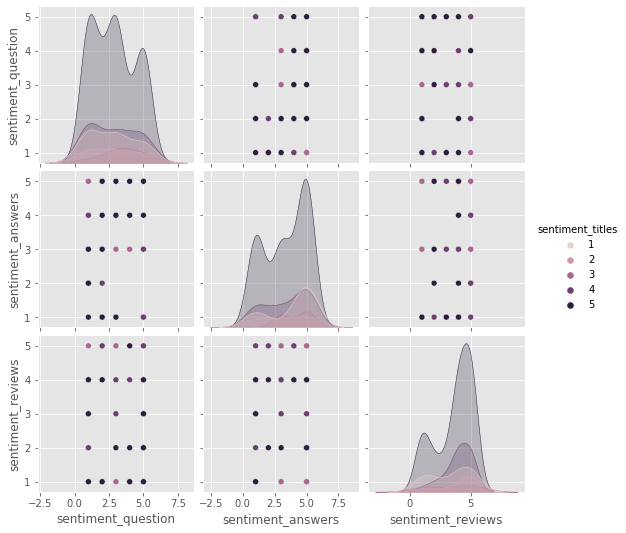

In [173]:
sns.pairplot(result_df,hue='sentiment_titles')
plt.savefig('sentiment_titles')

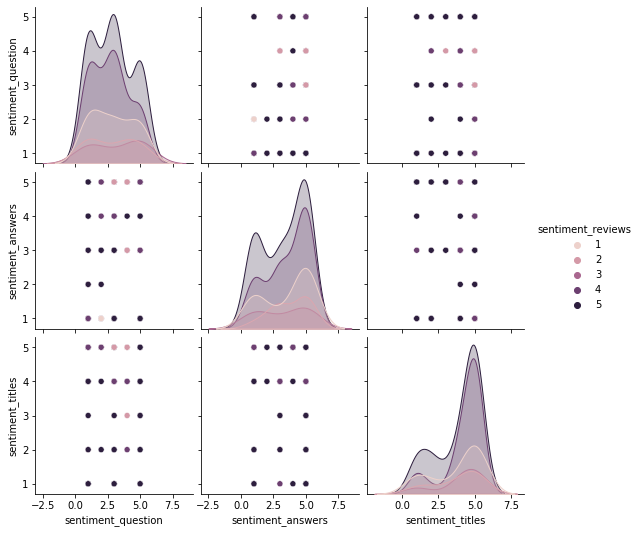

In [105]:
sns.pairplot(result_df,hue='sentiment_reviews')
plt.savefig('sentiment_reviews')

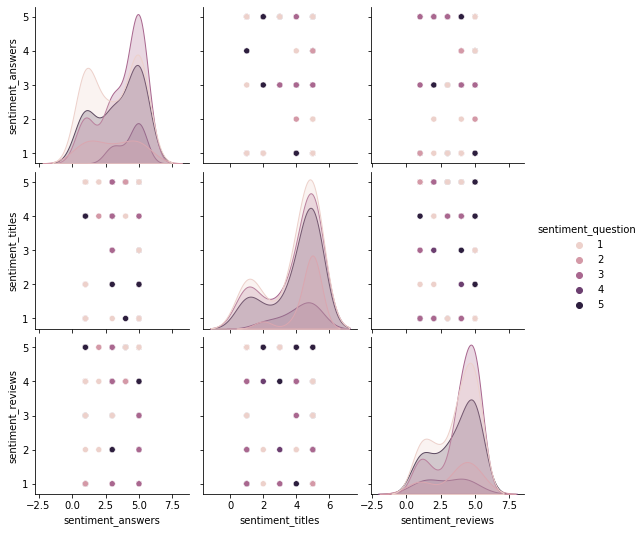

In [106]:
sns.pairplot(result_df,hue='sentiment_question')
plt.savefig('sentiment_questions')

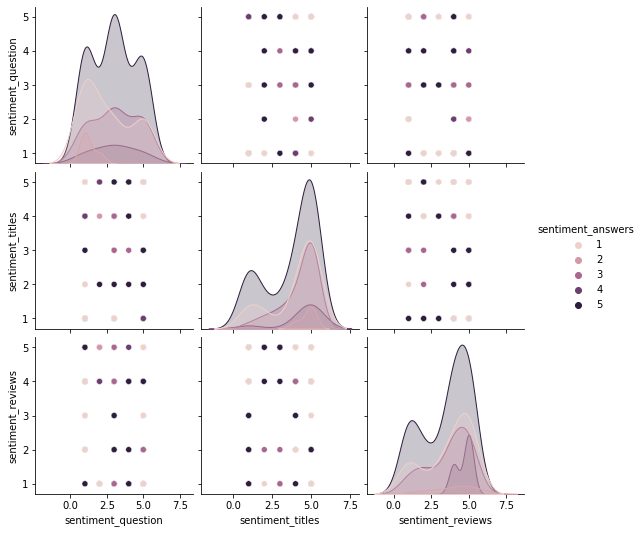

In [107]:
sns.pairplot(result_df,hue='sentiment_answers')
plt.savefig('sentiment_answers')

In [155]:
stats = result_df.groupby(['sentiment_question'])['sentiment_answers'].agg(['mean', 'count', 'std']).head(5)
print(stats)
print('-'*30)
ques_ci95_hi = []
ques_ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ques_ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ques_ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ques_ci95_hi
stats['ci95_lo'] = ques_ci95_lo
print(stats)

                        mean  count       std
sentiment_question                           
1                   3.111111     45  1.760969
2                   3.000000     12  1.758098
3                   3.804878     41  1.520189
4                   4.375000      8  0.916125
5                   3.457143     35  1.668794
------------------------------
                        mean  count       std   ci95_hi   ci95_lo
sentiment_question                                               
1                   3.111111     45  1.760969  3.625630  2.596592
2                   3.000000     12  1.758098  3.994738  2.005262
3                   3.804878     41  1.520189  4.270209  3.339547
4                   4.375000      8  0.916125  5.009843  3.740157
5                   3.457143     35  1.668794  4.010015  2.904271


In [156]:
stats = result_df.groupby(['sentiment_reviews'])['sentiment_titles'].agg(['mean', 'count', 'std']).head(5)
print(stats)
print('-'*30)
ci95_hi = []
ci95_lo = []
for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)

                       mean  count       std
sentiment_reviews                           
1                  3.782609     23  1.704447
2                  3.750000     12  1.602555
3                  4.000000     11  1.549193
4                  4.250000     40  1.276011
5                  3.890909     55  1.486641
------------------------------
                       mean  count       std   ci95_hi   ci95_lo
sentiment_reviews                                               
1                  3.782609     23  1.704447  4.479196  3.086021
2                  3.750000     12  1.602555  4.656731  2.843269
3                  4.000000     11  1.549193  4.915515  3.084485
4                  4.250000     40  1.276011  4.645440  3.854560
5                  3.890909     55  1.486641  4.283808  3.498010


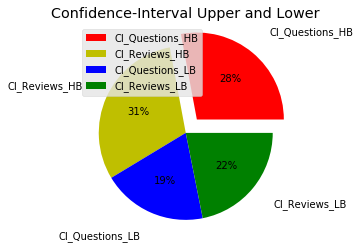

In [203]:
from statistics import mean
a=mean(ques_ci95_hi)
b=mean(ci95_hi)
c=mean(ques_ci95_lo)
d=mean(ci95_lo)
new_ci=[a,b,c,d]
lab=['CI_Questions_HB','CI_Reviews_HB','CI_Questions_LB','CI_Reviews_LB']
myexplode = [0.2, 0, 0, 0]
plt.pie(new_ci,labels=lab,pctdistance=0.6, labeldistance=1.3,autopct='%1.0f%%',explode=myexplode,colors=['r','y','b','g'])
plt.legend(lab, loc=2)
plt.title('Confidence-Interval Upper and Lower')
plt.savefig('CI_Product_Review_Question')

# DONE